In [2]:
import numpy as np
from sklearn import decomposition
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

In [116]:
digits = load_digits()
X = digits["data"]/255.
Y = digits["target"]
print(X.shape)

(1797, 64)


# SVD

In [128]:
x_means = np.mean(X, axis = 0)
X_cent = X - x_means

U, s, V = np.linalg.svd(X_cent, full_matrices=True)

S = np.zeros(X_cent.shape, dtype=complex)
S[:X_cent.shape[1], :X_cent.shape[1]] = np.diag(s)

rec_svd = np.dot(U, np.dot(S, V)) + x_means

print(np.allclose(X, rec_svd))

True


# NMF

In [129]:
nmf = decomposition.NMF(n_components=20, max_iter=5000, tol=1e-6)
w = nmf.fit_transform(X)
h = nmf.components_

rec_nmf = np.dot(w, h)

print(np.allclose(X, rec_nmf))

False


# Comparison

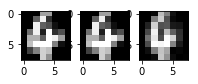

In [136]:
fig, ax = plt.subplots(1, 3, figsize=(3, 1))

rand_number = np.random.randint(len(X))
    
ax[0].imshow(X[rand_number].reshape(8, 8), cmap='gray')
ax[1].imshow(np.abs(rec_svd[rand_number]).reshape(8, 8), cmap='gray')
ax[2].imshow(rec_nmf[rand_number].reshape(8, 8), cmap='gray')
    
plt.show()

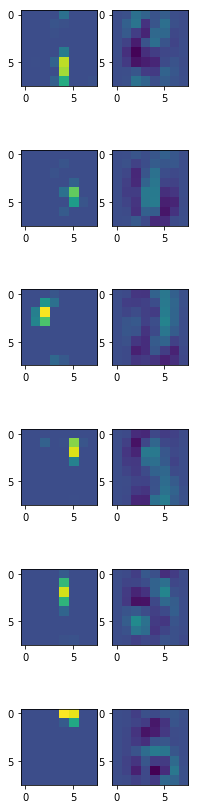

In [146]:
fig, ax = plt.subplots(6, 2, figsize=(3, 15))

vmin = min(np.min(h[:6]), np.min(V[:6]))
vmax = max(np.max(h[:6]), np.max(V[:6]))

for i in range(6):
    cax1 = ax[i, 0].imshow(h[i].reshape(8, 8), vmin=vmin, vmax=vmax)
    cax2 = ax[i, 1].imshow(V[i].reshape(8, 8), vmin=vmin, vmax=vmax)
plt.show()